In [61]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.plots import plot_volatilities
import sys 
from datetime import datetime
from tqdm import tqdm
sns.set_theme()

from src.models import SimulateStatement, Model
from src.modelstats import ModelStats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
from src.animate import *

In [63]:
data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"
lambd = 0.1
delta = 0.01
lag = 20

In [64]:
date_of_reckoning = datetime(2019,7,10)
cut_data_at_time = datetime(2019,5,12)

In [65]:
opinion_analysis = ModelStats(data_path, data_deputados_path)
opinion_analysis = opinion_analysis.get_votes(lambd, delta, lag, date_of_reckoning )
opinion_analysis = opinion_analysis.get_changes()
opinion_analysis = opinion_analysis.get_fluxes()

10it [00:00, 87.20it/s]
10it [00:00, 47180.02it/s]
100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


In [88]:
Plista = {}
Plista_ids = {}

for time_ in opinion_analysis.times :

    Plista[time_] = [i.opinion for i in opinion_analysis.from_time_to_politician_opinion_list[time_].politician_opinions]
    Plista_ids[time_] = [i.politician_id for i in opinion_analysis.from_time_to_politician_opinion_list[time_].politician_opinions]

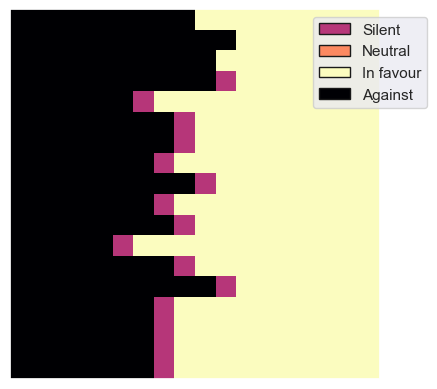

In [67]:
animate_ordered(Plista, opinion_analysis.times)

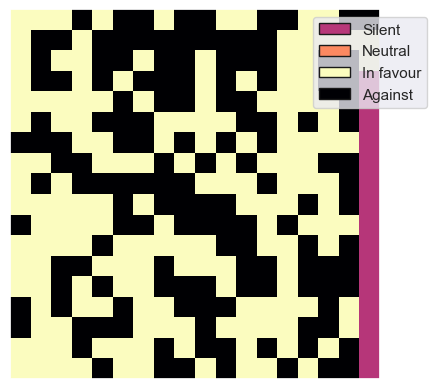

In [68]:
animate_unordered(Plista, opinion_analysis.times)

In [69]:
parties_opinion_evolution = opinion_analysis.visualize_parties_evolution()

100%|██████████| 10/10 [00:00<00:00, 18.94it/s]


In [71]:
serie_A, serie_K, serie_O = opinion_analysis.serie_temporal_partido('MDB')

In [86]:
opinion_list_in_time = make_party_viz(serie_A=serie_A,serie_O=serie_O,serie_K=serie_K, times_ = opinion_analysis.times)

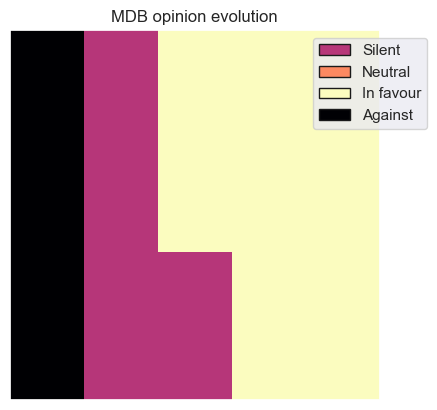

In [87]:
animate_party(opinion_list_in_time, opinion_analysis.times, 'MDB')